#  Population by Sex and Age
`Info`:https://www.censtatd.gov.hk/en/web_table.html?id=110-01001<BR>
`Docs`:https://www.censtatd.gov.hk/datagovhk/WT_data_dict_en.pdf<BR>
`API Link`: https://www.censtatd.gov.hk/api/get.php?id=110-01001&lang=en&full_series=1

In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [3]:
url = "https://www.censtatd.gov.hk/api/get.php?id=110-01001&lang=en&full_series=1"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
try:
    response = requests.get(url, headers=headers)
    if response.status_code==200 : print('Connect successfully!')
    data = response.json()
except Exception as e:
    print(e) 

Connect successfully!


In [4]:
df = pd.DataFrame(data['dataSet'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10926 entries, 0 to 10925
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SEX       10926 non-null  object
 1   SEXDesc   10926 non-null  object
 2   AGE       10926 non-null  object
 3   AGEDesc   10926 non-null  object
 4   freq      10926 non-null  object
 5   period    10926 non-null  object
 6   sv        10926 non-null  object
 7   svDesc    10926 non-null  object
 8   figure    10926 non-null  object
 9   sd_value  10926 non-null  object
dtypes: object(10)
memory usage: 853.7+ KB


In [6]:
df.describe(include='all')

,SEX,SEXDesc,AGE,AGEDesc,freq,period,sv,svDesc,figure,sd_value
count,10926,10926,10926,10926,10926,10926,10926,10926,10926.0,10926
unique,3,3,19,19,1,129,1,2,3515.0,4
top,,Total,,Total,H,196106,POP,Number ('000),3.1,
freq,3642,3642,774,774,10926,114,10926,5463,152.0,10716


In [7]:
# Age Group
df.AGEDesc.unique()

array(['Total', '0 - 4', '10 - 14', '15 - 19', '20 - 24', '25 - 29',
       '30 - 34', '35 - 39', '40 - 44', '45 - 49', '5 - 9', '50 - 54',
       '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84',
       '≥85'], dtype=object)

In [8]:
for col in df.select_dtypes(include='O').columns:
    print(col, df[col].unique())

SEX ['' 'F' 'M']
SEXDesc ['Total' 'Female' 'Male']
AGE ['' '0-4' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49'
 '5-9' '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80-84' '85+']
AGEDesc ['Total' '0 - 4' '10 - 14' '15 - 19' '20 - 24' '25 - 29' '30 - 34'
 '35 - 39' '40 - 44' '45 - 49' '5 - 9' '50 - 54' '55 - 59' '60 - 64'
 '65 - 69' '70 - 74' '75 - 79' '80 - 84' '≥85']
freq ['H']
period ['196106' '196112' '196206' '196212' '196306' '196312' '196406' '196412'
 '196506' '196512' '196606' '196612' '196706' '196712' '196806' '196812'
 '196906' '196912' '197006' '197012' '197106' '197112' '197206' '197212'
 '197306' '197312' '197406' '197412' '197506' '197512' '197606' '197612'
 '197706' '197712' '197806' '197812' '197906' '197912' '198006' '198012'
 '198106' '198112' '198206' '198212' '198306' '198312' '198406' '198412'
 '198506' '198512' '198606' '198612' '198706' '198712' '198806' '198812'
 '198906' '198912' '199006' '199012' '199106' '199112' '199206' '199212'
 '19930

In [9]:
temp = df.loc[(df.SEXDesc=='Total')&(df.svDesc=='% of total population')&
                (df.AGEDesc!='Total')]  #.figure.astype(float)

In [10]:
temp.loc[temp.index, temp['figure']] = temp.figure.astype(float)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, 5464 to 10887
Columns: 1702 entries, SEX to 10.2
dtypes: float64(1692), object(10)
memory usage: 22.0+ MB


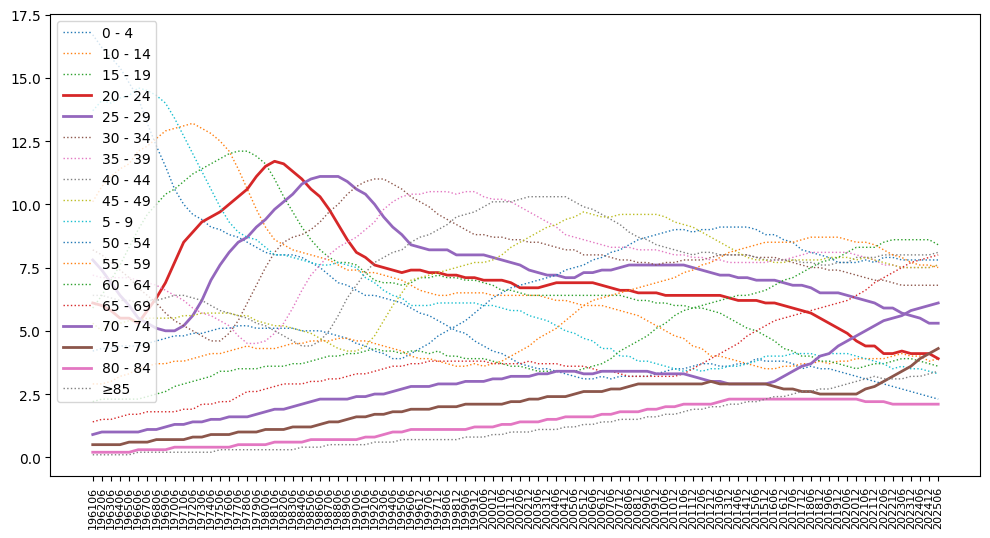

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
for age in df.AGEDesc.unique()[1:]:
    if age[0] in ['7','8','9','2']: s= 'solid' ; w =2
    else: s = 'dotted'; w =1
    ax.plot(temp.loc[temp.AGEDesc==age, 'period'], temp.loc[temp.AGEDesc==age, 'figure'], 
            label=age, ls=s, lw=w )
    ax.legend()
plt.xticks(rotation=90, fontsize=8)
plt.show()